<a href="https://colab.research.google.com/github/Gilanggmlnt/Pengolahan-Citra/blob/main/Jobsheet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praktikum 1. Menghitung Jarak Berbasis Piksel (Euclidean & Manhattan)

Jarak Euclidean antara Patch 1 dan Patch 2: 24.7650
Jarak Euclidean antara Patch 1 dan Patch 3: 5.0000
Jarak Manhattan antara Patch 1 dan Patch 2: 936.4392
Jarak Manhattan antara Patch 1 dan Patch 3: 250.0000


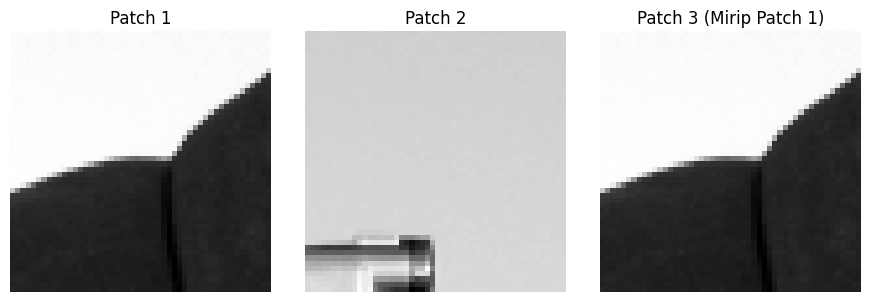

In [1]:
import numpy as np
from skimage import data, img_as_float
from scipy.spatial import distance
import matplotlib.pyplot as plt

# 1. Buat dua patch citra sederhana atau ambil dari citra asli
image = img_as_float(data.camera())
patch1 = image[100:150, 100:150]
patch2 = image[100:150, 300:350] # Patch dari lokasi berbeda
patch3 = patch1 + 0.1 # Patch1 dengan sedikit noise/perubahan intensitas
patch3 = np.clip(patch3, 0, 1) # Pastikan nilai tetap di [0, 1]

# 2. Flatten patch menjadi vektor 1D
vec1 = patch1.flatten()
vec2 = patch2.flatten()
vec3 = patch3.flatten()

# 3. Hitung Jarak Euclidean (L2)
dist_l2_12 = distance.euclidean(vec1, vec2)
dist_l2_13 = distance.euclidean(vec1, vec3)

# 4. Hitung Jarak Manhattan (L1 - disebut 'cityblock' di scipy)
dist_l1_12 = distance.cityblock(vec1, vec2)
dist_l1_13 = distance.cityblock(vec1, vec3)

# 5. Tampilkan hasil dan patch
print(f"Jarak Euclidean antara Patch 1 dan Patch 2: {dist_l2_12:.4f}")
print(f"Jarak Euclidean antara Patch 1 dan Patch 3: {dist_l2_13:.4f}")
print(f"Jarak Manhattan antara Patch 1 dan Patch 2: {dist_l1_12:.4f}")
print(f"Jarak Manhattan antara Patch 1 dan Patch 3: {dist_l1_13:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
axes[0].imshow(patch1, cmap='gray')
axes[0].set_title('Patch 1')
axes[0].axis('off')
axes[1].imshow(patch2, cmap='gray')
axes[1].set_title('Patch 2')
axes[1].axis('off')
axes[2].imshow(patch3, cmap='gray')
axes[2].set_title('Patch 3 (Mirip Patch 1)')
axes[2].axis('off')
plt.tight_layout()
plt.show()


## Praktikum 2. Menghitung Cosine Similarity antara Histogram Warna

Cosine Similarity antara Image 1 (Astronaut) dan Image 2 (Coffee): 0.8156
Cosine Similarity antara Image 1 (Astronaut) dan Image 3 (Astronaut): 1.0000
Cosine Similarity antara Image 1 (Astronaut) dan Image 4 (Astronaut Downsampled): 1.0000


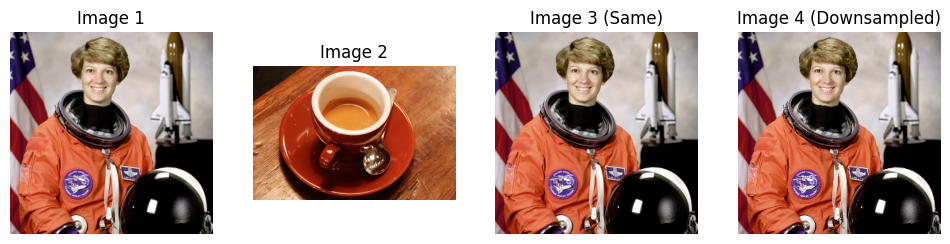

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_ubyte, io, color
from scipy.spatial import distance

# Fungsi untuk menghitung histogram RGB gabungan
def calculate_rgb_histogram(image, bins=16):
    img_uint8 = img_as_ubyte(image)
    hist_r, _ = np.histogram(img_uint8[:,:,0].ravel(), bins=bins, range=(0, 256))
    hist_g, _ = np.histogram(img_uint8[:,:,1].ravel(), bins=bins, range=(0, 256))
    hist_b, _ = np.histogram(img_uint8[:,:,2].ravel(), bins=bins, range=(0, 256))
    # Gabungkan histogram R, G, B menjadi satu vektor fitur
    hist_combined = np.concatenate((hist_r, hist_g, hist_b))
    # Normalisasi (opsional, tapi sering dilakukan)
    hist_combined = hist_combined.astype(float) / np.sum(hist_combined)
    return hist_combined

# 1. Muat dua citra berwarna
try:
    # Gunakan citra berbeda dari skimage atau file Anda
    image1 = data.astronaut()
    image2 = data.coffee() # Citra yang berbeda
    image3 = data.astronaut() # Citra yang sama (untuk perbandingan)
    image4 = image1[::2, ::2, :] # Versi downsampled dari image1
except Exception as e:
    print(f"Gagal memuat data skimage: {e}. Membuat citra dummy.")
    image1 = np.random.rand(100, 100, 3)
    image2 = np.random.rand(100, 100, 3) * 0.5
    image3 = image1.copy()
    image4 = image1[::2,::2,:]

# 2. Hitung histogram untuk setiap citra
hist1 = calculate_rgb_histogram(image1)
hist2 = calculate_rgb_histogram(image2)
hist3 = calculate_rgb_histogram(image3)
hist4 = calculate_rgb_histogram(image4)

# 3. Hitung Cosine Similarity (1 - Cosine Distance)
# scipy.spatial.distance.cosine menghitung jarak (1 - similarity)
sim_12 = 1 - distance.cosine(hist1, hist2)
sim_13 = 1 - distance.cosine(hist1, hist3)
sim_14 = 1 - distance.cosine(hist1, hist4)

# 4. Tampilkan hasil
print(f"Cosine Similarity antara Image 1 (Astronaut) dan Image 2 (Coffee): {sim_12:.4f}")
print(f"Cosine Similarity antara Image 1 (Astronaut) dan Image 3 (Astronaut): {sim_13:.4f}")
print(f"Cosine Similarity antara Image 1 (Astronaut) dan Image 4 (Astronaut Downsampled): {sim_14:.4f}")

# Visualisasi (opsional)
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].imshow(image1); axes[0].set_title('Image 1'); axes[0].axis('off')
axes[1].imshow(image2); axes[1].set_title('Image 2'); axes[1].axis('off')
axes[2].imshow(image3); axes[2].set_title('Image 3 (Same)'); axes[2].axis('off')
axes[3].imshow(image4); axes[3].set_title('Image 4 (Downsampled)'); axes[3].axis('off')
plt.show()


## Praktikum 3. Menghitung Structural Similarity Index (SSIM)

SSIM (Ref vs Almost Same): 0.9994
SSIM (Ref vs Noisy): 0.2958
SSIM (Ref vs Contrast): 0.9651
SSIM (Ref vs Blurred): 0.8027


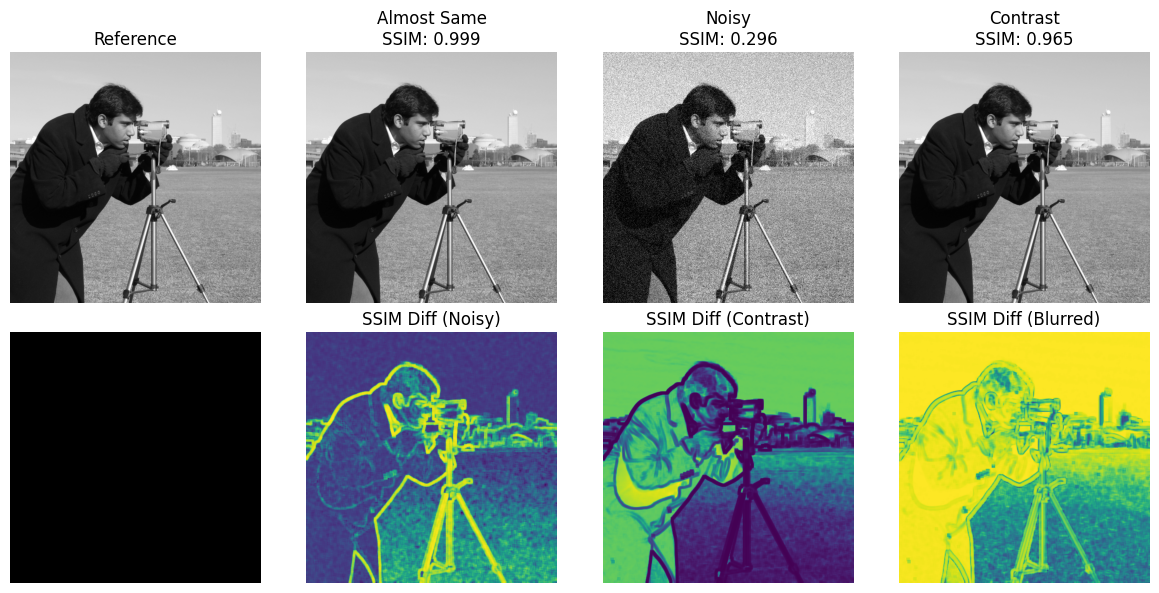

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.transform import resize
from skimage.util import random_noise
from skimage.filters import gaussian

# 1. Muat citra referensi
image_ref = img_as_float(data.camera())

# 2. Buat beberapa versi citra yang 'terdistorsi'
# a) Citra yang hampir sama (ditambah noise sangat kecil agar SSIM < 1)
image_same = random_noise(image_ref, mode='gaussian', var=1e-6)

# b) Citra dengan noise Gaussian lebih tinggi
image_noisy = random_noise(image_ref, mode='gaussian', var=0.01)

# c) Citra dengan kontras berbeda (contoh: dikalikan skalar)
image_contrast = np.clip(image_ref * 0.8, 0, 1)

# d) Citra yang di-blur
image_blurred = gaussian(image_ref, sigma=1.5, channel_axis=None)

# 3. Hitung SSIM antara citra referensi dan citra terdistorsi
data_range = image_ref.max() - image_ref.min()

ssim_same, _ = ssim(image_ref, image_same, data_range=data_range, full=True)
ssim_noisy, diff_noisy = ssim(image_ref, image_noisy, data_range=data_range, full=True)
ssim_contrast, diff_contrast = ssim(image_ref, image_contrast, data_range=data_range, full=True)
ssim_blurred, diff_blurred = ssim(image_ref, image_blurred, data_range=data_range, full=True)

# 4. Tampilkan hasil SSIM dan citra perbedaan
print(f"SSIM (Ref vs Almost Same): {ssim_same:.4f}")
print(f"SSIM (Ref vs Noisy): {ssim_noisy:.4f}")
print(f"SSIM (Ref vs Contrast): {ssim_contrast:.4f}")
print(f"SSIM (Ref vs Blurred): {ssim_blurred:.4f}")

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(image_ref, cmap='gray'); ax[0].set_title('Reference'); ax[0].axis('off')
ax[1].imshow(image_same, cmap='gray'); ax[1].set_title(f'Almost Same\nSSIM: {ssim_same:.3f}'); ax[1].axis('off')
ax[2].imshow(image_noisy, cmap='gray'); ax[2].set_title(f'Noisy\nSSIM: {ssim_noisy:.3f}'); ax[2].axis('off')
ax[3].imshow(image_contrast, cmap='gray'); ax[3].set_title(f'Contrast\nSSIM: {ssim_contrast:.3f}'); ax[3].axis('off')

# Menampilkan peta perbedaan SSIM
ax[4].imshow(np.zeros_like(image_ref), cmap='gray'); ax[4].set_title(''); ax[4].axis('off')
ax[5].imshow(diff_noisy, cmap='viridis'); ax[5].set_title('SSIM Diff (Noisy)'); ax[5].axis('off')
ax[6].imshow(diff_contrast, cmap='viridis'); ax[6].set_title('SSIM Diff (Contrast)'); ax[6].axis('off')
ax[7].imshow(diff_blurred, cmap='viridis'); ax[7].set_title('SSIM Diff (Blurred)'); ax[7].axis('off')

plt.tight_layout()
plt.show()


## Praktikum 4. Penerapan Template Matching

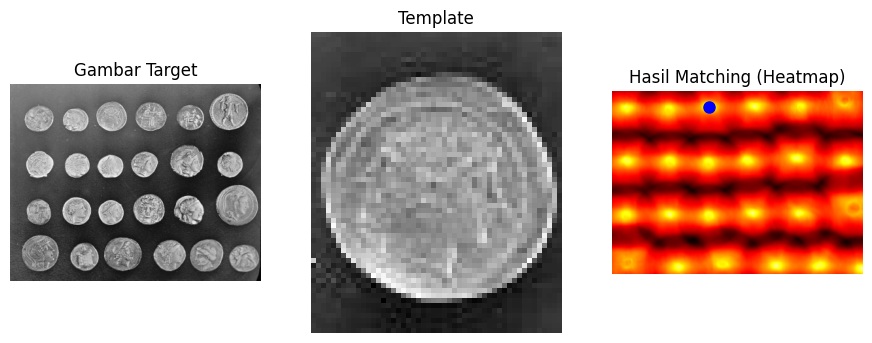

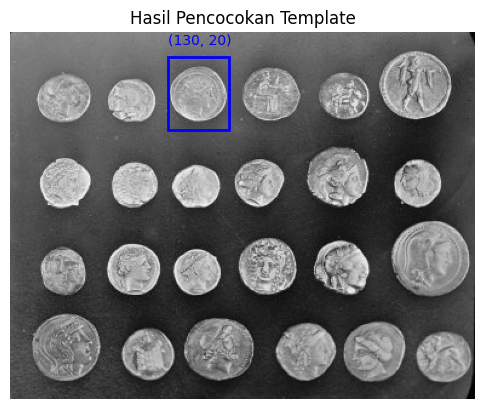

Template ditemukan pada koordinat x=130, y=20


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template

# 1. Muat citra target dan buat/muat citra template
image = data.coins()

# Ambil bagian berbeda dari citra sebagai template (ubah koordinat untuk hasil berbeda)
template = image[20:80, 130:180]

# 2. Lakukan template matching menggunakan Normalized Cross-Correlation
result = match_template(image, template)

# 3. Temukan lokasi dengan skor matching tertinggi
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]  # (col, row) → (x, y)

# 4. Visualisasi hasil
fig, ax = plt.subplots(1, 3, figsize=(11, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Gambar Target')
ax[0].set_axis_off()

ax[1].imshow(template, cmap='gray')
ax[1].set_title('Template')
ax[1].set_axis_off()

# Heatmap hasil matching
ax[2].imshow(result, cmap='hot')
ax[2].set_title('Hasil Matching (Heatmap)')
ax[2].set_axis_off()
ax[2].plot(x, y, 'bo', markersize=8)  # tanda titik biru

# 5. Tampilkan kotak hasil pada citra asli
fig2, ax_main = plt.subplots(figsize=(6, 6))
ax_main.imshow(image, cmap='gray')
ax_main.set_title('Hasil Pencocokan Template')
ax_main.set_axis_off()
h, w = template.shape
rect = plt.Rectangle((x, y), w, h, edgecolor='blue', facecolor='none', lw=2)
ax_main.add_patch(rect)
ax_main.annotate(f'({x}, {y})', (x, y - 10), color='blue')

plt.show()

print(f"Template ditemukan pada koordinat x={x}, y={y}")


## Praktikum 5. Simulasi Content-Based Image Retrieval (CBIR) Sederhana

Memuat dan memproses citra database...
- astronaut berhasil diproses.
- camera berhasil diproses.
- coffee berhasil diproses.
- chelsea berhasil diproses.
- rocket berhasil diproses.

Hasil pencarian berdasarkan kemiripan warna (paling kiri = paling mirip):
Rank 1: rocket (Jarak: 0.000)
Rank 2: coffee (Jarak: 0.544)
Rank 3: chelsea (Jarak: 0.578)
Rank 4: astronaut (Jarak: 0.682)
Rank 5: camera (Jarak: 0.754)


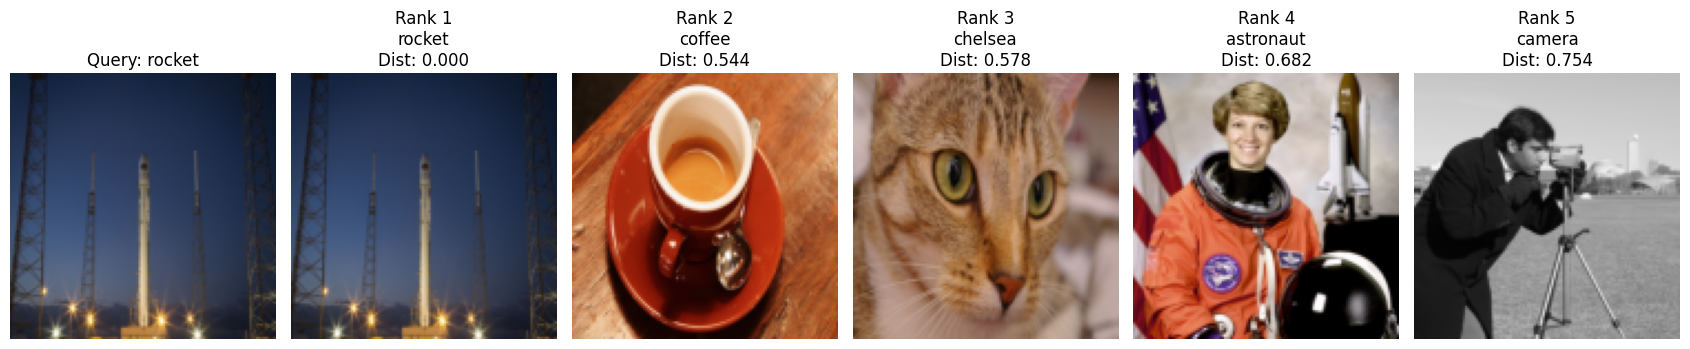

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, transform, img_as_float, img_as_ubyte
from scipy.spatial import distance

# Fungsi untuk menghitung histogram RGB
def calculate_rgb_histogram(image, bins=32):
    if image.dtype == float:
        image = img_as_ubyte(image)
    hist_r, _ = np.histogram(image[:,:,0].ravel(), bins=bins, range=(0, 256))
    hist_g, _ = np.histogram(image[:,:,1].ravel(), bins=bins, range=(0, 256))
    hist_b, _ = np.histogram(image[:,:,2].ravel(), bins=bins, range=(0, 256))
    hist_combined = np.concatenate((hist_r, hist_g, hist_b))
    hist_sum = np.sum(hist_combined)
    if hist_sum > 0:
        hist_combined = hist_combined.astype(float) / hist_sum
    else:
        hist_combined = hist_combined.astype(float)
    return hist_combined

# Database citra
image_db_names = ["astronaut", "camera", "coffee", "chelsea", "rocket"]
database_images = []
database_hists = []

print("Memuat dan memproses citra database...")
for name in image_db_names:
    try:
        img = getattr(data, name)()
        if img.ndim == 2:
            img = color.gray2rgb(img)
        img_resized = transform.resize(img, (120, 120), anti_aliasing=True)
        database_images.append(img_resized)
        database_hists.append(calculate_rgb_histogram(img_resized))
        print(f"- {name} berhasil diproses.")
    except Exception as e:
        print(f"Kesalahan saat memproses {name}: {e}")

# Citra query
query_image_name = "rocket"
query_index = image_db_names.index(query_image_name)
query_image = database_images[query_index]
query_hist = database_hists[query_index]

# Hitung jarak cosine antara query dan database
distances = []
for hist in database_hists:
    dist = distance.cosine(query_hist, hist)
    distances.append(dist)

# Urutkan berdasarkan kemiripan (jarak terkecil)
sorted_indices = np.argsort(distances)

# Tampilkan hasil retrieval
num_results_to_show = len(database_images)
fig, axes = plt.subplots(1, num_results_to_show + 1, figsize=(17, 4))

# Plot query image
axes[0].imshow(query_image)
axes[0].set_title(f"Query: {query_image_name}")
axes[0].axis('off')

# Plot hasil retrieval
print("\nHasil pencarian berdasarkan kemiripan warna (paling kiri = paling mirip):")
for i, idx in enumerate(sorted_indices):
    rank = i + 1
    ax = axes[rank]
    ax.imshow(database_images[idx])
    ax.set_title(f"Rank {rank}\n{image_db_names[idx]}\nDist: {distances[idx]:.3f}")
    ax.axis('off')
    print(f"Rank {rank}: {image_db_names[idx]} (Jarak: {distances[idx]:.3f})")

plt.tight_layout()
plt.show()


## Fitur Berbeda untuk CBIR

Memuat dan memproses citra database...
- astronaut berhasil diproses.
- camera berhasil diproses.
- coffee berhasil diproses.
- chelsea berhasil diproses.
- rocket berhasil diproses.

Hasil pencarian berdasarkan rata-rata warna (kiri = paling mirip):
Rank 1: rocket (Jarak: 0.000)
Rank 2: astronaut (Jarak: 0.395)
Rank 3: chelsea (Jarak: 0.423)
Rank 4: camera (Jarak: 0.442)
Rank 5: coffee (Jarak: 0.444)


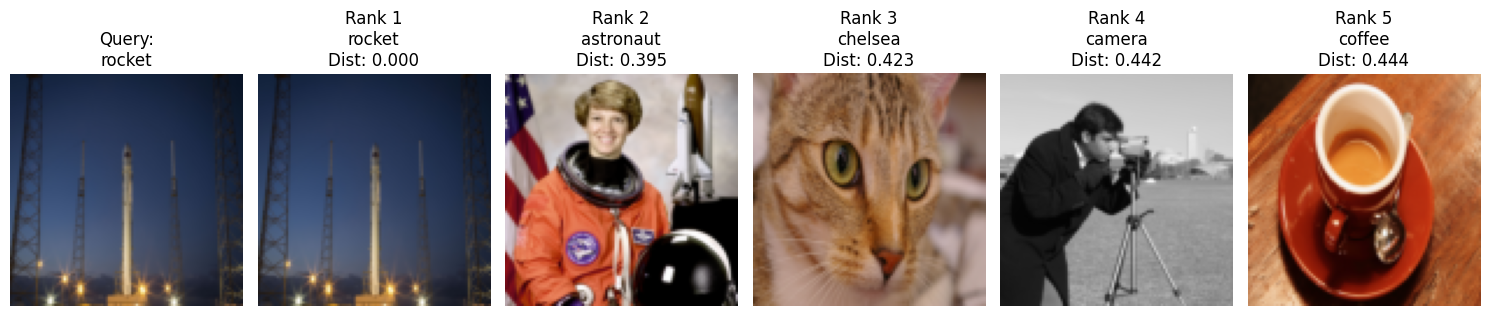

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, transform, img_as_float
from scipy.spatial import distance

# Fungsi menghitung rata-rata warna RGB sebagai fitur (3 dimensi)
def calculate_mean_rgb(image):
    if image.dtype != float:
        image = img_as_float(image)
    mean_r = np.mean(image[:, :, 0])
    mean_g = np.mean(image[:, :, 1])
    mean_b = np.mean(image[:, :, 2])
    return np.array([mean_r, mean_g, mean_b])

# 1. Siapkan database citra
image_db_names = ["astronaut", "camera", "coffee", "chelsea", "rocket"]
database_images = []
database_features = []

print("Memuat dan memproses citra database...")
for name in image_db_names:
    try:
        img = getattr(data, name)()
        if img.ndim == 2:  # jika grayscale, ubah ke RGB
            img = color.gray2rgb(img)
        img_resized = transform.resize(img, (100, 100), anti_aliasing=True)
        database_images.append(img_resized)
        feature_vector = calculate_mean_rgb(img_resized)
        database_features.append(feature_vector)
        print(f"- {name} berhasil diproses.")
    except Exception as e:
        print(f"Error pada citra {name}: {e}")

# 2. Tentukan query image
query_image_name = "rocket"
query_index = image_db_names.index(query_image_name)
query_image = database_images[query_index]
query_feature = database_features[query_index]

# 3. Hitung jarak Euclidean antara query dan semua gambar
distances = []
for feature in database_features:
    dist = distance.euclidean(query_feature, feature)
    distances.append(dist)

# 4. Urutkan berdasarkan jarak terkecil
sorted_indices = np.argsort(distances)

# 5. Tampilkan hasil
num_results = len(database_images)
fig, axes = plt.subplots(1, num_results + 1, figsize=(15, 3))

# Tampilkan query
axes[0].imshow(query_image)
axes[0].set_title(f"Query:\n{query_image_name}")
axes[0].axis('off')

print("\nHasil pencarian berdasarkan rata-rata warna (kiri = paling mirip):")
for i, idx in enumerate(sorted_indices):
    rank = i + 1
    axes[rank].imshow(database_images[idx])
    axes[rank].set_title(f"Rank {rank}\n{image_db_names[idx]}\nDist: {distances[idx]:.3f}")
    axes[rank].axis('off')
    print(f"Rank {rank}: {image_db_names[idx]} (Jarak: {distances[idx]:.3f})")

plt.tight_layout()
plt.show()


## Template Matching Invariant

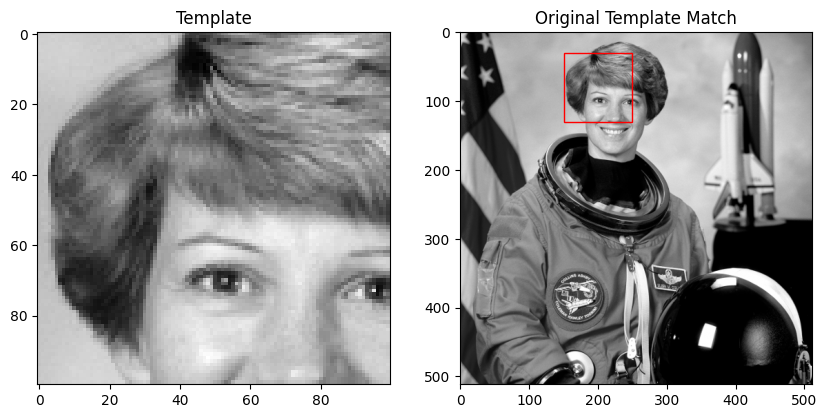

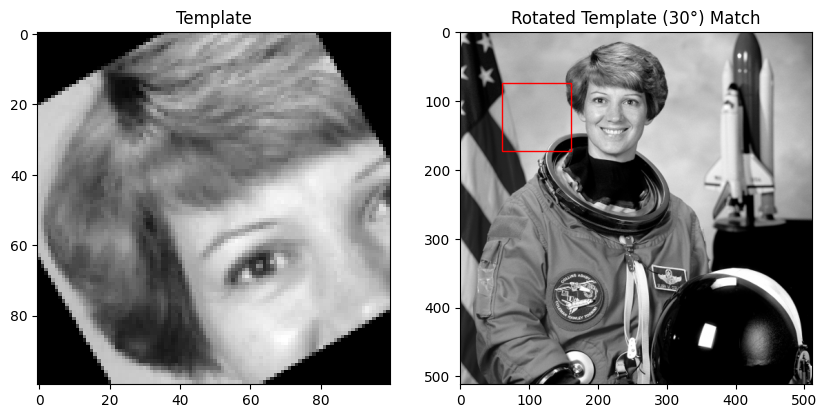

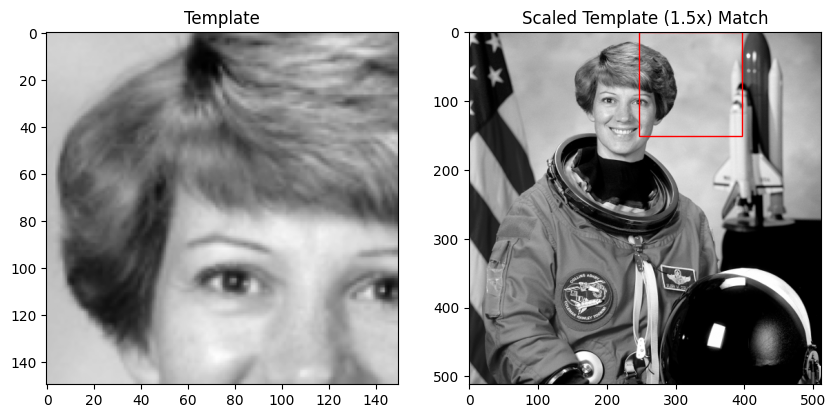

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, transform, feature
from skimage.io import imread
from skimage.util import img_as_float
from skimage.exposure import rescale_intensity

# Ambil gambar grayscale dari skimage
image = color.rgb2gray(data.astronaut())
image = img_as_float(image)

# Crop bagian kecil sebagai template
template = image[30:130, 150:250]

# Fungsi untuk mencocokkan template dan menampilkan hasil
def match_and_plot(image, template, title):
    result = feature.match_template(image, template)
    ij = np.unravel_index(np.argmax(result), result.shape)
    x, y = ij[::-1]

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(template, cmap='gray')
    ax[0].set_title('Template')
    ax[1].imshow(image, cmap='gray')
    ax[1].set_title(title)
    rect = plt.Rectangle((x, y), template.shape[1], template.shape[0],
                         edgecolor='r', facecolor='none')
    ax[1].add_patch(rect)
    plt.show()

# 1. Template asli
match_and_plot(image, template, 'Original Template Match')

# 2. Template dirotasi 30 derajat
template_rotated = transform.rotate(template, angle=30)
match_and_plot(image, template_rotated, 'Rotated Template (30°) Match')

# 3. Template diskalakan (dibesarkan)
template_scaled = transform.rescale(template, scale=1.5, anti_aliasing=True)
match_and_plot(image, template_scaled, 'Scaled Template (1.5x) Match')
